# MatrixProfile

MaNiAC (AIQ 2021)

---

Ref:
- dataset: https://www.cs.ucr.edu/~eamonn/discords/
- libs: https://qiita.com/k-kotera/items/91c4181d6b4f1b7f434b

---

ECGデータ読み込み

In [ ]:
import pathlib

In [ ]:
fpath = pathlib.Path("dataset/qtdbsel102.txt")
fpath.exists()

True

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(fpath, header=None, delimiter="\t", names=["Time", "ecg-1", "ecg-2"])
df.tail(3)

,Time,ecg-1,ecg-2
44997,379.988,4.88,5.085
44998,379.992,4.87,5.085
44999,379.996,4.89,5.115


可視化

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="turbo")

In [ ]:
def plot(df, xlabel, ylabel):
    plt.figure(figsize=(12,4))
    plt.plot(df[xlabel], df[ylabel])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()
    plt.close("all")

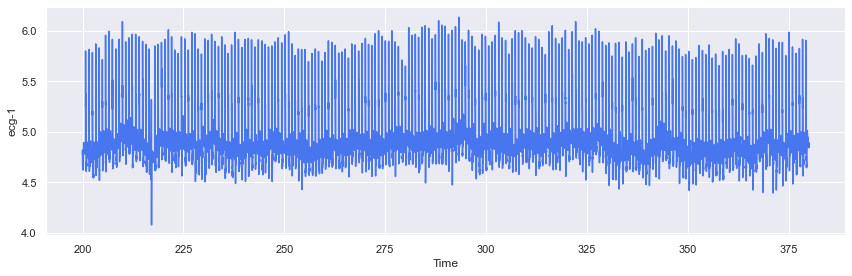

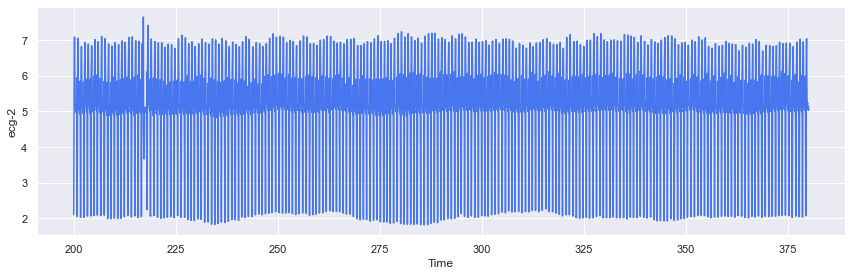

In [ ]:
plot(df, xlabel="Time", ylabel="ecg-1")
plot(df, xlabel="Time", ylabel="ecg-2")

Time = 215 近傍にて異常値が見られるので，詳細を可視化する．

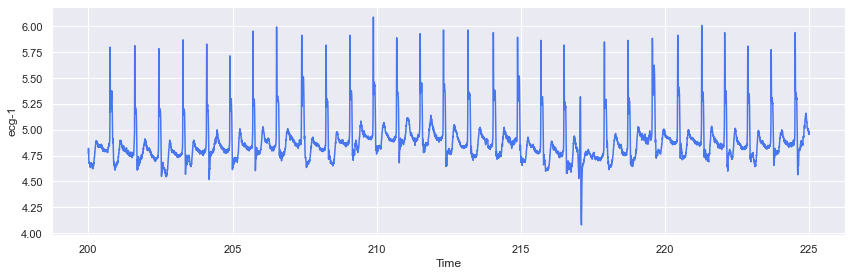

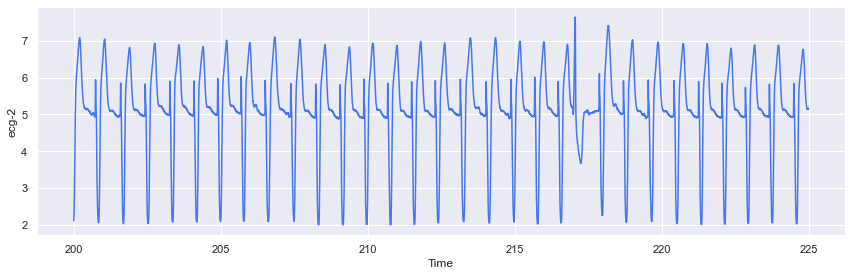

In [ ]:
plot(df=df[(200<=df["Time"]) & (df["Time"]<=225)], xlabel="Time", ylabel="ecg-1")
plot(df=df[(200<=df["Time"]) & (df["Time"]<=225)], xlabel="Time", ylabel="ecg-2")

MatrixProfileを試す

In [ ]:
from matrixprofile import matrixProfile

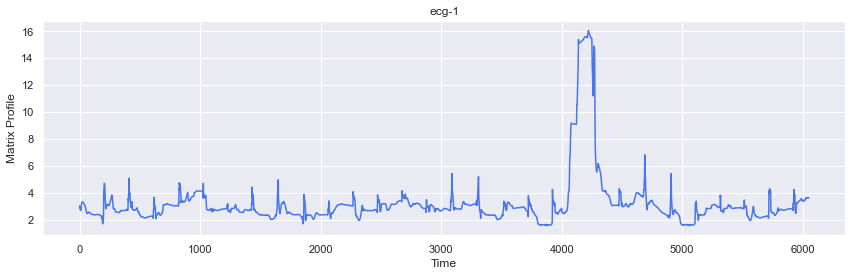

In [ ]:
window_size = 200
mp = matrixProfile.scrimp_plus_plus(
    df[(200<=df["Time"]) & (df["Time"]<=225)]["ecg-1"].to_numpy(),
    window_size
)

plt.figure(figsize=(12,4))
plt.plot(mp[0])
plt.xlabel("Time")
plt.ylabel("Matrix Profile")
plt.title("ecg-1")
plt.tight_layout()
plt.show()
plt.close("all")

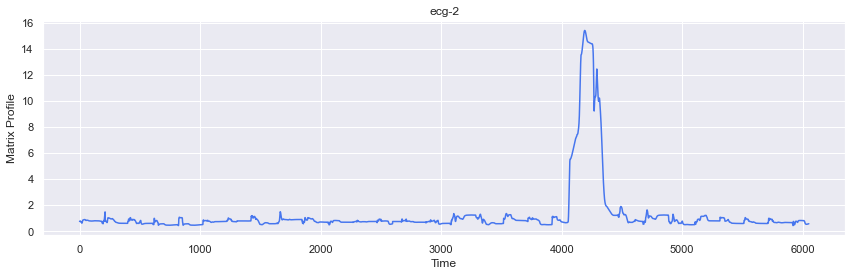

In [ ]:
window_size = 200
mp = matrixProfile.scrimp_plus_plus(
    df[(200<=df["Time"]) & (df["Time"]<=225)]["ecg-2"].to_numpy(),
    window_size
)

plt.figure(figsize=(12,4))
plt.plot(mp[0])
plt.xlabel("Time")
plt.ylabel("Matrix Profile")
plt.title("ecg-2")
plt.tight_layout()
plt.show()
plt.close("all")